In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')
df.to_csv('glass.csv',index=False)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
# checking duplicates
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [5]:
#droping the duplicates
df.drop_duplicates(inplace=True)

In [6]:
#checking null values
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


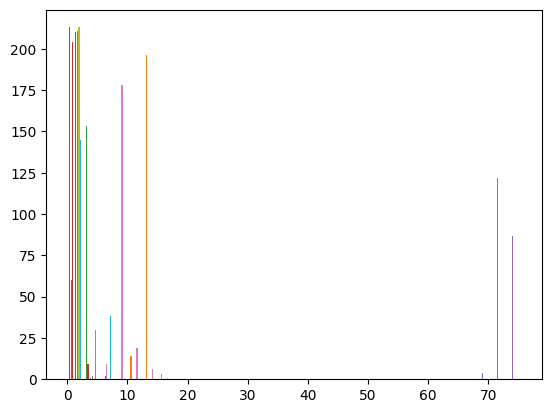

In [14]:
plt.hist(df, bins=30)
plt.show()

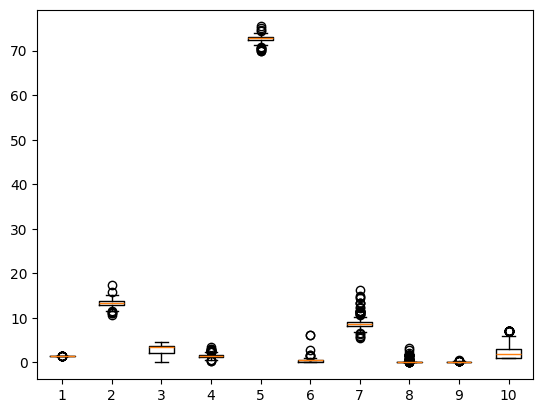

In [15]:
plt.boxplot(df)
plt.show()

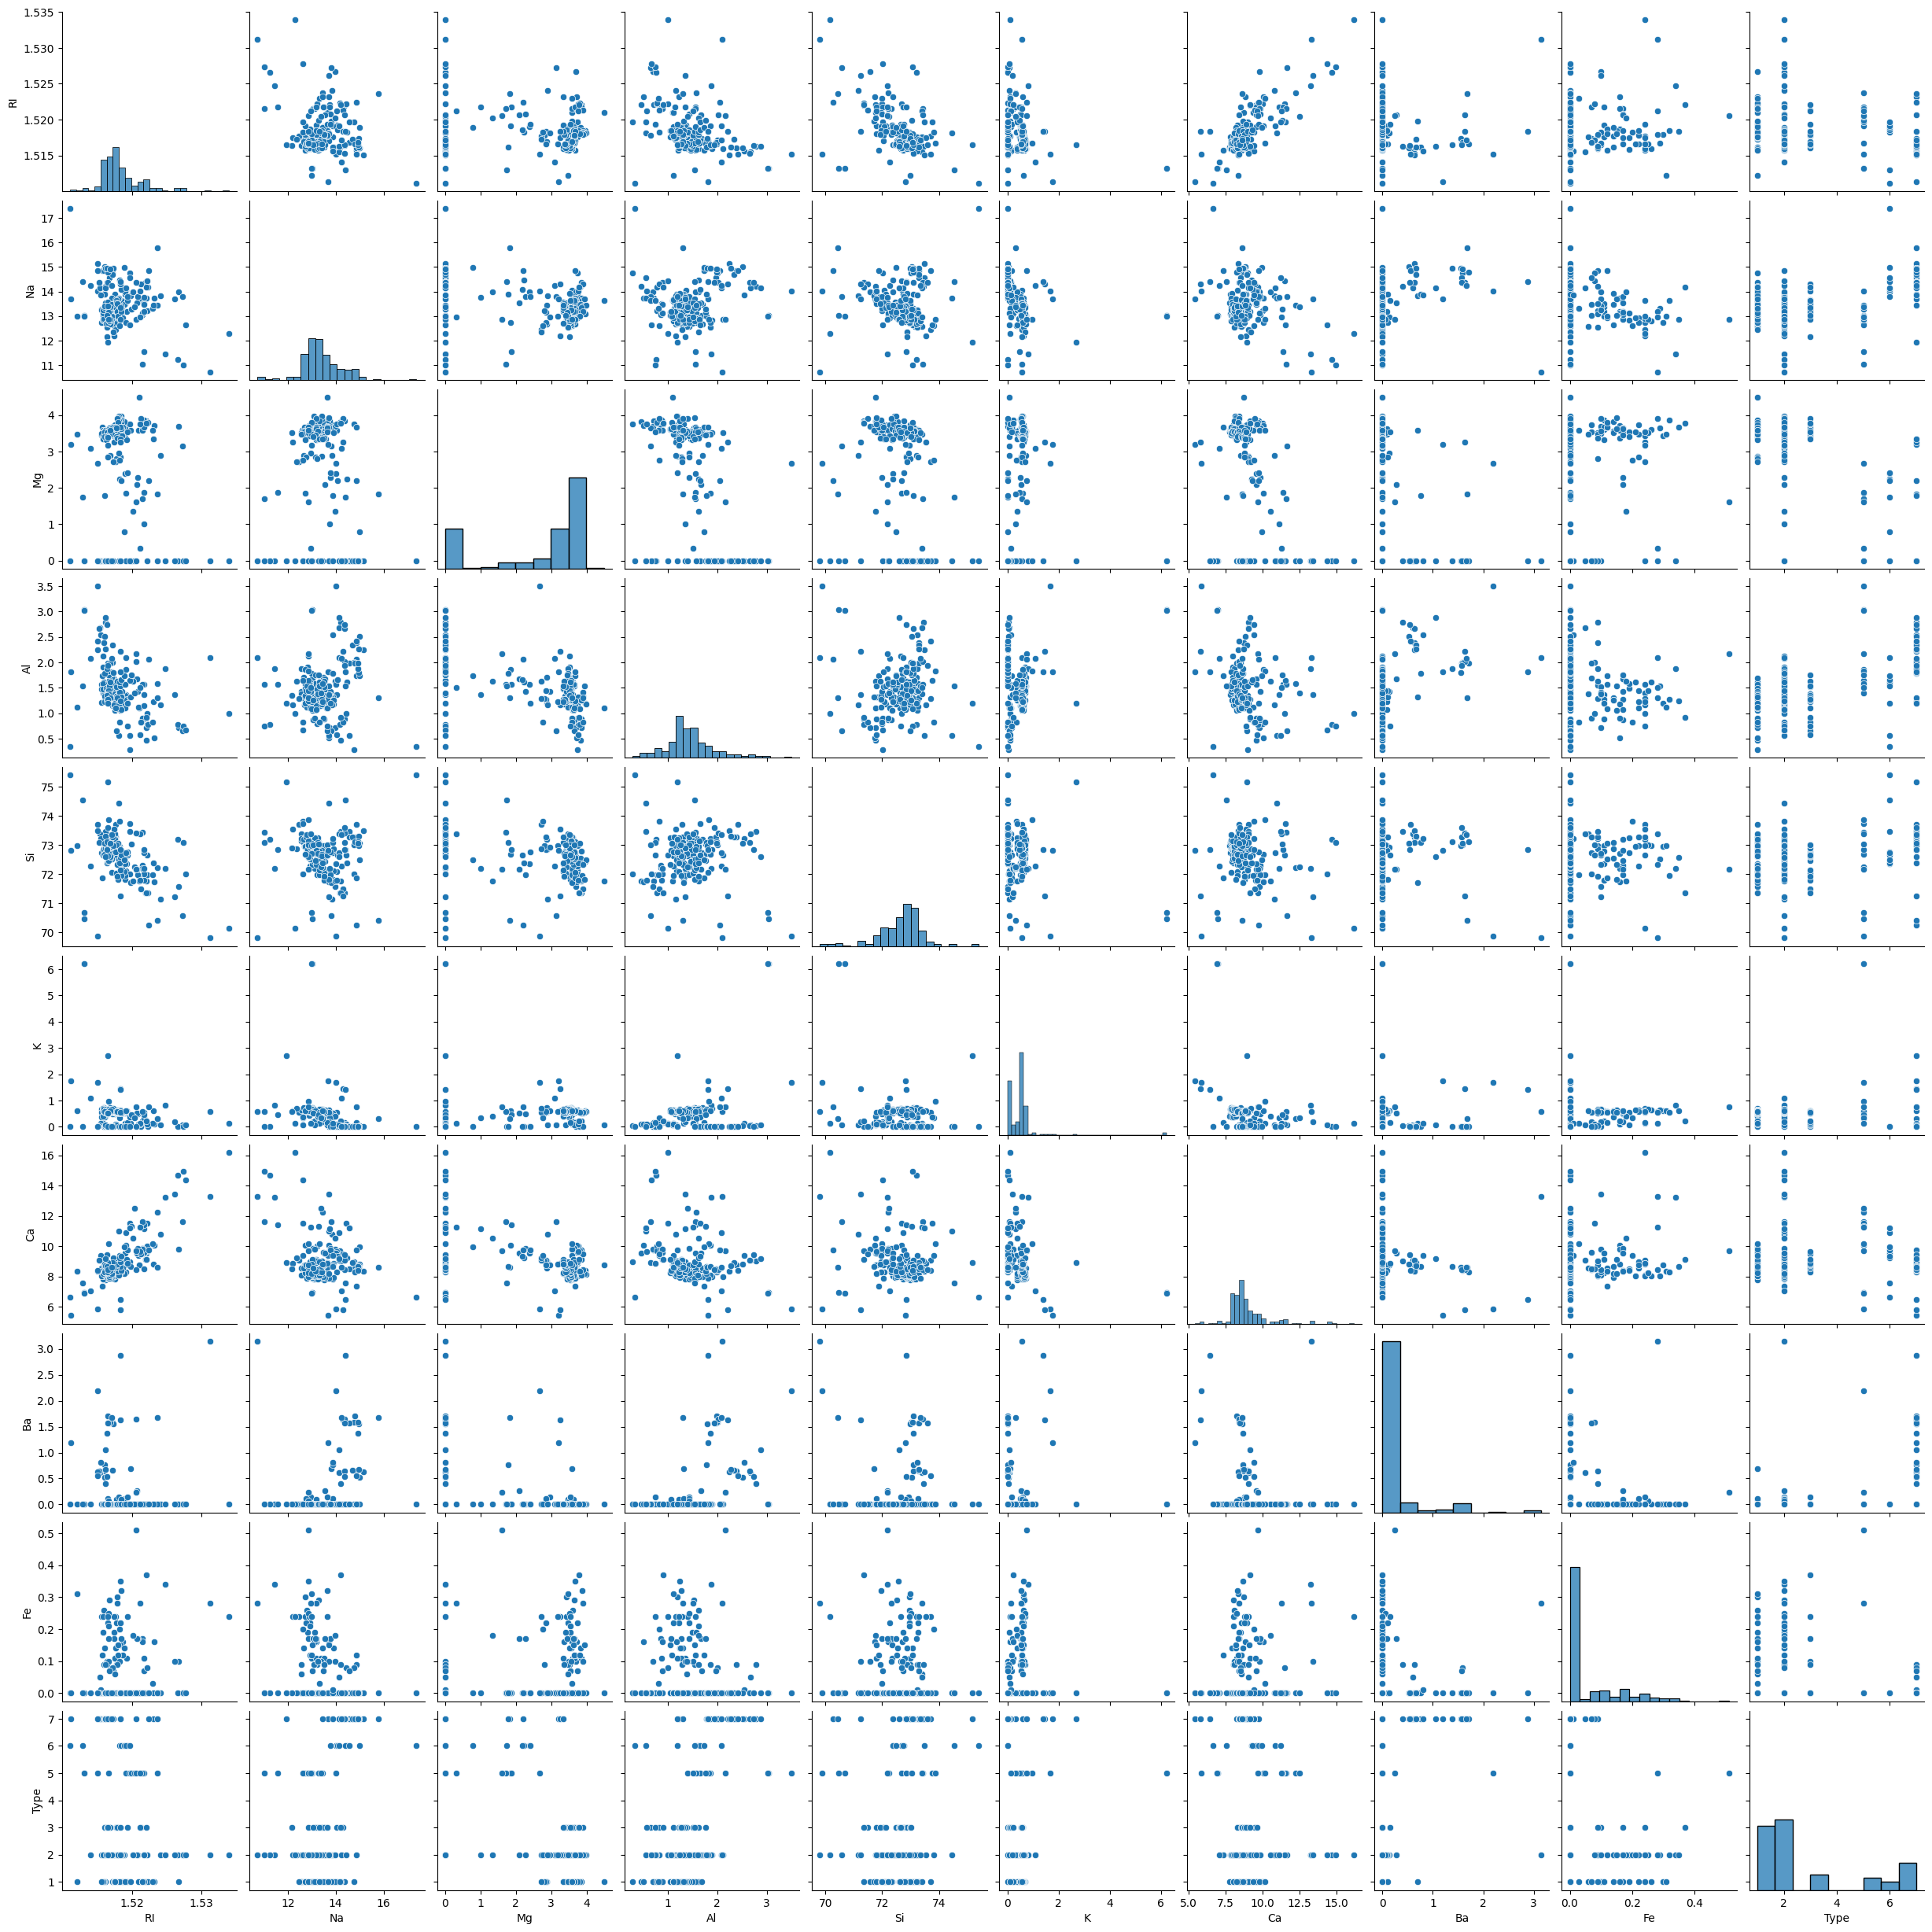

In [7]:
sns.pairplot(df)

In [8]:
array=df.values
x=array[:,0:9]
y=array[:,9]
seed=7

In [9]:
#bagged decision tree
kfold=KFold(n_splits=10)
cart=DecisionTreeClassifier()
num_trees=100
model=BaggingClassifier(cart,n_estimators=num_trees,random_state=seed)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean()*100)

51.51515151515152


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
logr=LogisticRegression(max_iter=400)
model_logr=BaggingClassifier(logr,n_estimators=100)
model_logr.fit(x_train,y_train)
model_logr.score(x_test,y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.6511627906976745

In [11]:
#random forest
num_trees = 100
max_features =int(np.sqrt(x.shape[1]))
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features,random_state=0)
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

0.7976190476190476


In [12]:
#adaboost classification
seed=7
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(estimator=cart,n_estimators=10,random_state=seed)
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

0.1181818181818182


In [19]:
preds=model_logr.predict(x_test)
pd.Series(preds).value_counts()

,count
2.0,19
1.0,15
7.0,8
5.0,1


In [21]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         1.0       0.47      0.78      0.58         9
         2.0       0.74      0.78      0.76        18
         3.0       0.00      0.00      0.00         6
         5.0       1.00      0.50      0.67         2
         6.0       0.00      0.00      0.00         2
         7.0       0.75      1.00      0.86         6

    accuracy                           0.65        43
   macro avg       0.49      0.51      0.48        43
weighted avg       0.56      0.65      0.59        43



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
accuracy_score(y_test,preds)


0.6511627906976745